In [1]:
%matplotlib inline
import pandas as pd


titles = pd.read_csv('cast.csv', index_col=None)
titles.head()


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1.Define a year as a "Superman year" whose films features more Superman chracters than Batman.How many years in film history have been Superman years.

In [2]:
import pandas as pd

cast = pd.read_csv('cast.csv', index_col=None)
cast.head()




superman_batman_films = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]


character_counts_by_year = superman_batman_films.groupby(['year', 'character']).size().unstack(fill_value=0)


superman_years = character_counts_by_year[character_counts_by_year['Superman'] > character_counts_by_year['Batman']]


num_superman_years = superman_years.shape[0]


print("Number of 'Superman years' in film history:", num_superman_years)



Number of 'Superman years' in film history: 11


# 2.How many years have been "Batman years", with more Batman Characters than Superman Characters

In [3]:

superman_batman_films = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]


character_counts_by_year = superman_batman_films.groupby(['year', 'character']).size().unstack(fill_value=0)


batman_years = character_counts_by_year[character_counts_by_year['Batman'] > character_counts_by_year['Superman']]


num_batman_years = batman_years.shape[0]


print("Number of 'Batman years' in film history:", num_batman_years)


Number of 'Batman years' in film history: 27


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film

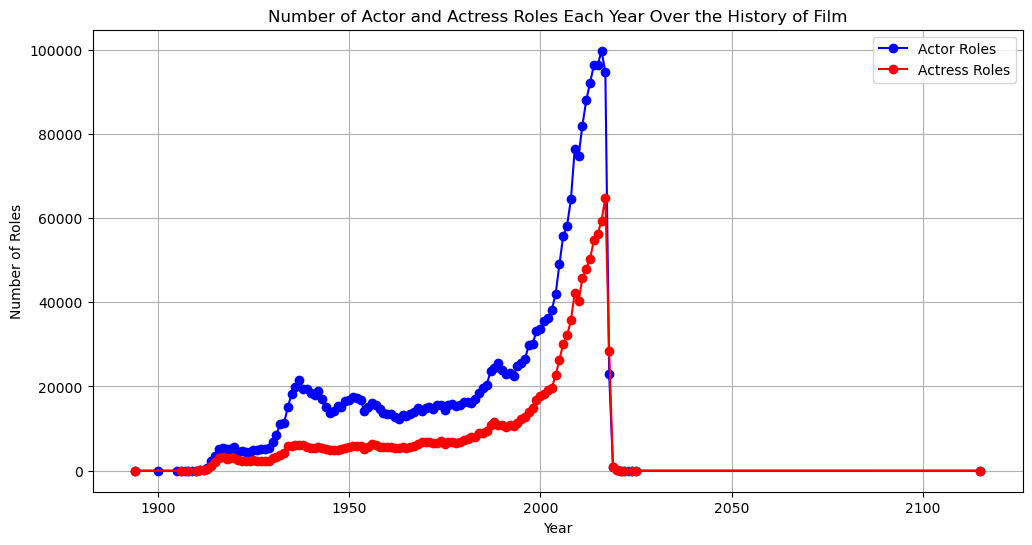

In [4]:
import matplotlib.pyplot as plt


actors = cast[cast['type'] == 'actor']
actresses = cast[cast['type'] == 'actress']


actor_roles_by_year = actors.groupby('year').size()
actress_roles_by_year = actresses.groupby('year').size()


plt.figure(figsize=(12, 6))
plt.plot(actor_roles_by_year.index, actor_roles_by_year.values, label='Actor Roles', color='blue', marker='o')
plt.plot(actress_roles_by_year.index, actress_roles_by_year.values, label='Actress Roles', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year Over the History of Film')
plt.legend()
plt.grid()
plt.show()


# 4.Plot the number of actor roles each year and the number of actress roles each year , but this time as a kind='area' plot

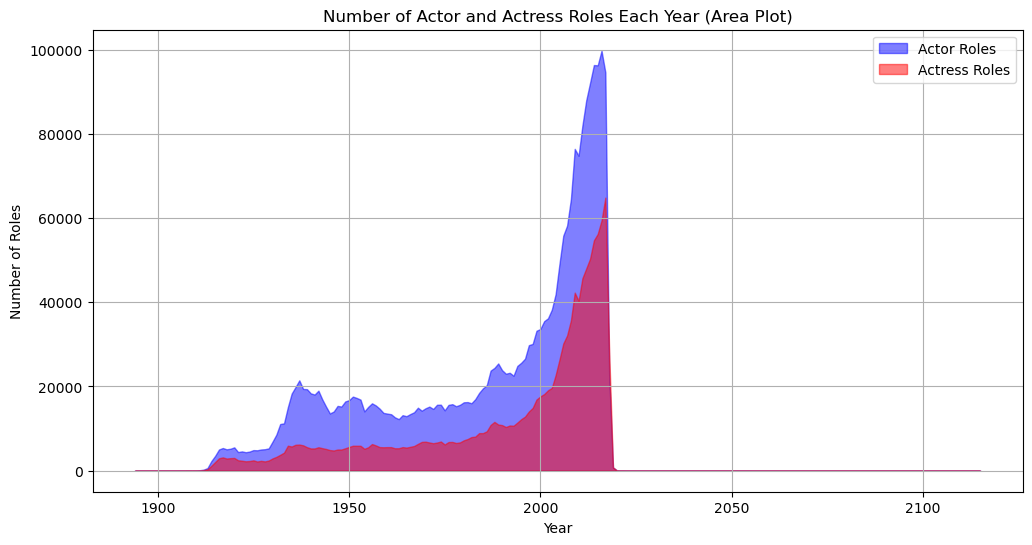

In [5]:
import matplotlib.pyplot as plt


actors = cast[cast['type'] == 'actor']
actresses = cast[cast['type'] == 'actress']


actor_roles_by_year = actors.groupby('year').size()
actress_roles_by_year = actresses.groupby('year').size()


plt.figure(figsize=(12, 6))
plt.fill_between(actor_roles_by_year.index, actor_roles_by_year.values, label='Actor Roles', color='blue', alpha=0.5)
plt.fill_between(actress_roles_by_year.index, actress_roles_by_year.values, label='Actress Roles', color='red', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.legend()
plt.grid()
plt.show()


# 5.plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film

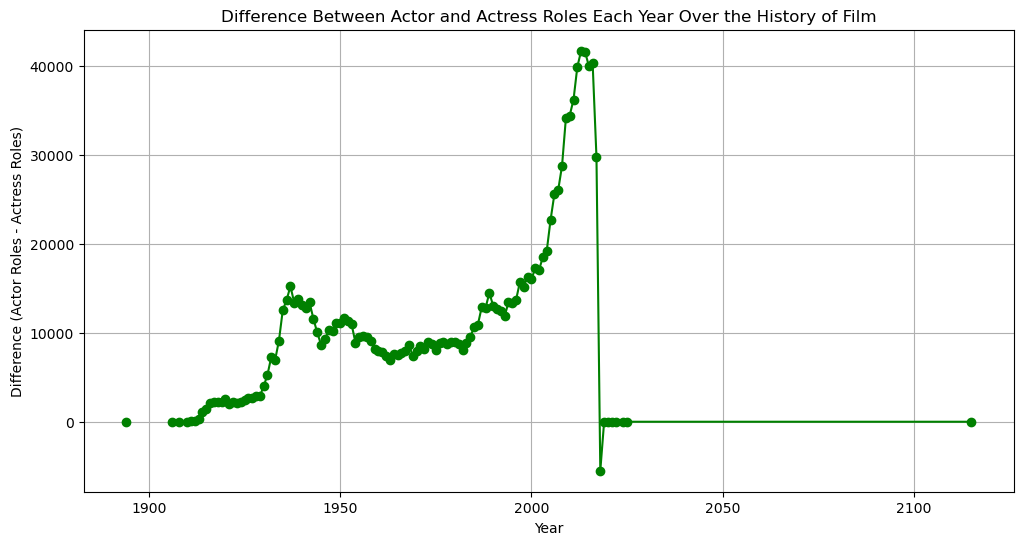

In [6]:
import matplotlib.pyplot as plt


actors = cast[cast['type'] == 'actor']
actresses = cast[cast['type'] == 'actress']


actor_roles_by_year = actors.groupby('year').size()
actress_roles_by_year = actresses.groupby('year').size()


role_difference = actor_roles_by_year - actress_roles_by_year


plt.figure(figsize=(12, 6))
plt.plot(role_difference.index, role_difference.values, color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year Over the History of Film')
plt.grid()
plt.show()


# 6.Plot the fraction of roles that have been 'actor' roles each year in the hisotry of film

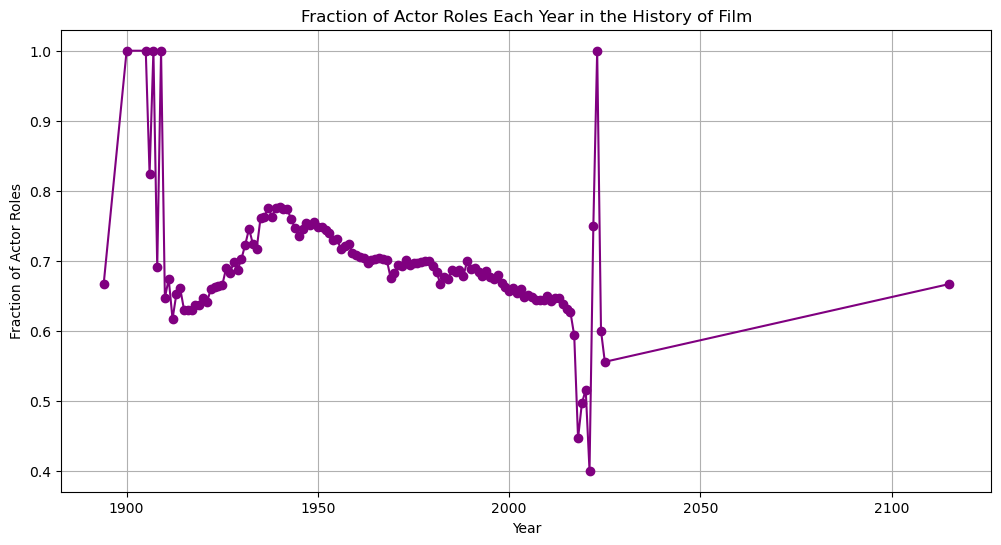

In [7]:
import matplotlib.pyplot as plt


total_roles_by_year = cast.groupby('year').size()


actor_roles = cast[cast['type'] == 'actor']


actor_roles_by_year = actor_roles.groupby('year').size()


fraction_actor_roles = actor_roles_by_year / total_roles_by_year


plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, color='purple', marker='o')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year in the History of Film')
plt.grid()
plt.show()


# 7.Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film

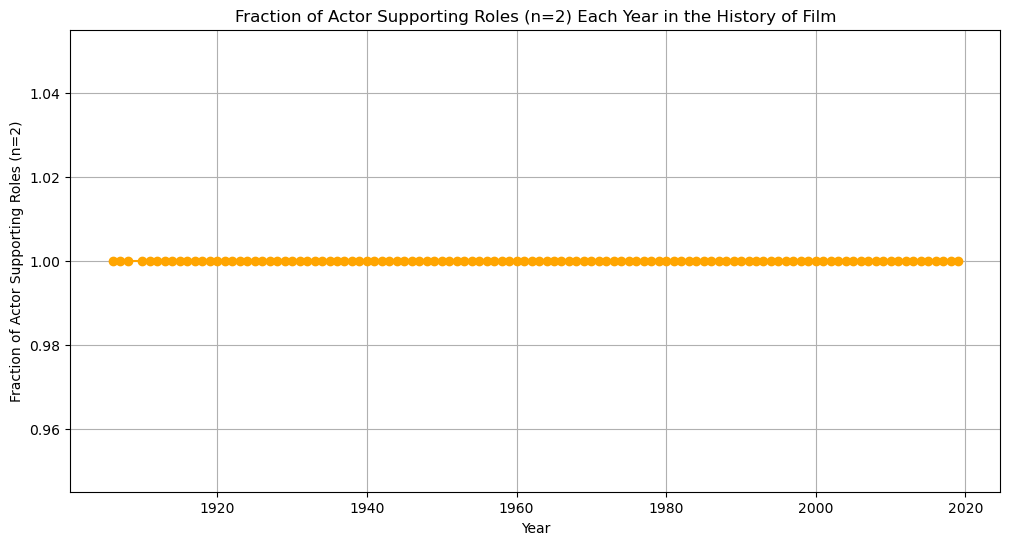

In [8]:
import matplotlib.pyplot as plt


supporting_roles_n2 = cast[(cast['n'] == 2) & (cast['type'] == 'actor')]


total_supporting_roles_n2_by_year = supporting_roles_n2.groupby('year').size()


actor_supporting_roles_n2 = supporting_roles_n2[supporting_roles_n2['type'] == 'actor']


actor_supporting_roles_n2_by_year = actor_supporting_roles_n2.groupby('year').size()


fraction_actor_supporting_roles_n2 = actor_supporting_roles_n2_by_year / total_supporting_roles_n2_by_year


plt.figure(figsize=(12, 6))
plt.plot(fraction_actor_supporting_roles_n2.index, fraction_actor_supporting_roles_n2.values, color='orange', marker='o')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Supporting Roles (n=2)')
plt.title('Fraction of Actor Supporting Roles (n=2) Each Year in the History of Film')
plt.grid()
plt.show()


# 8.Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history year of film  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


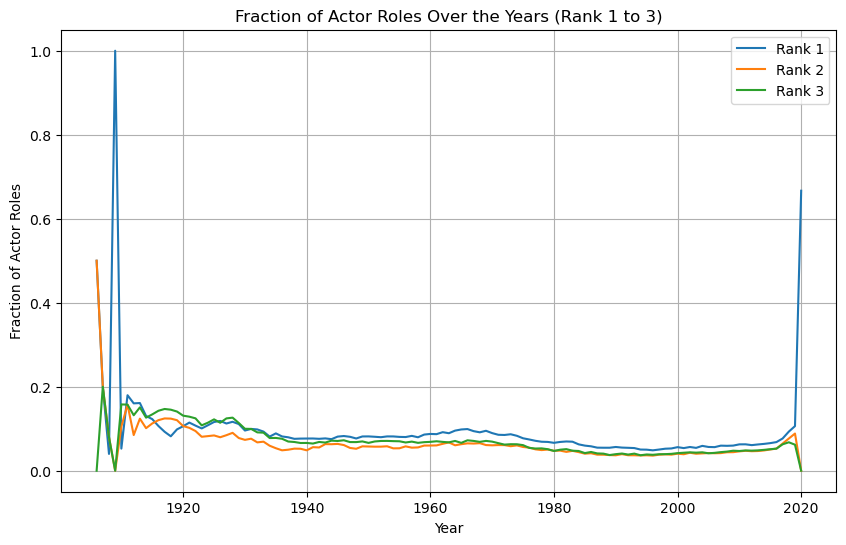

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the data into DataFrames
titles = pd.read_csv('titles.csv', index_col=None)
cast = pd.read_csv('cast.csv')

# Step 2: Filter 'cast' DataFrame to keep only 'actor' roles
actor_cast = cast[cast['type'] == 'actor']

# Step 3: Group by year and rank (n=1 to n=3)
grouped = actor_cast.groupby(['year', 'n'])

# Step 4: Calculate the fraction of 'actor' roles
role_fraction = grouped.size().unstack(fill_value=0).div(grouped.size().unstack(fill_value=0).sum(axis=1), axis=0)

# Step 5: Create the line plot
plt.figure(figsize=(10, 6))

for n in range(1, 4):
    plt.plot(role_fraction.index, role_fraction[n], label=f'Rank {n}')

plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Over the Years (Rank 1 to 3)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()